# Assignment: CIFAR-100 Image Classification

In this section, we apply the same principles and model architectures to the CIFAR-100 dataset. This dataset is significantly more challenging than Fashion-MNIST, as it contains 100 classes of 32x32 color images. Our goal is to adapt our models and compare their performance on this more complex task.

## 1. Dataset Setup

First, we'll load the CIFAR-100 dataset. We will then preprocess the data by:
1.  **Normalizing** the pixel values to a range of 0 to 1.
2.  **One-hot encoding** the labels to a vector of 100 dimensions, which is necessary for categorical cross-entropy loss.
3.  **Verifying** the shapes of the resulting arrays.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels_one_hot.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels_one_hot.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 100)
CIFAR-100 Testing labels shape: (10000, 100)


## 2. Model Building

We will now adapt the three architectures from the Fashion-MNIST task for the CIFAR-100 dataset. Key changes include:
-   Updating the **input shape** to `(32, 32, 3)` to accommodate color images.
-   Changing the final **Dense layer** to have `100` output units with a softmax activation function for the 100 classes.

In [2]:
# 2.1) Basic ANN Model (Adapted for CIFAR-100)
cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_ann_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

cifar100_ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 2.2) Basic CNN Model (Adapted for CIFAR-100)
cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

cifar100_basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 2.3) Deeper CNN Model (Adapted for CIFAR-100)
cifar100_deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_deeper_cnn_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

cifar100_deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,828 (1.41 MB)

 Trainable params: 369,124 (1.41 MB)

 Non-trainable params: 704 (2.75 KB)

## 3. Model Training

We will train each of the three models on the CIFAR-100 training data. We'll use `EarlyStopping` to prevent overfitting by monitoring validation loss and `ModelCheckpoint` to save the weights of the best performing epoch for each model.

In [5]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# --- Train ANN Model ---
model_checkpoint_cifar100_ann = keras.callbacks.ModelCheckpoint('best_cifar100_ann_model.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')
print("\n--- Training CIFAR-100 ANN Model ---")
cifar100_ann_history = cifar100_ann_model.fit(cifar100_train_images, cifar100_train_labels_one_hot, epochs=50, batch_size=64, validation_data=(cifar100_test_images, cifar100_test_labels_one_hot), callbacks=[early_stopping, model_checkpoint_cifar100_ann])

# --- Train Basic CNN Model ---
model_checkpoint_cifar100_basic_cnn = keras.callbacks.ModelCheckpoint('best_cifar100_basic_cnn_model.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')
print("\n--- Training CIFAR-100 Basic CNN Model ---")
cifar100_basic_cnn_history = cifar100_basic_cnn_model.fit(cifar100_train_images, cifar100_train_labels_one_hot, epochs=50, batch_size=64, validation_data=(cifar100_test_images, cifar100_test_labels_one_hot), callbacks=[early_stopping, model_checkpoint_cifar100_basic_cnn])

# --- Train Deeper CNN Model ---
model_checkpoint_cifar100_deeper_cnn = keras.callbacks.ModelCheckpoint('best_cifar100_deeper_cnn_model.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')
print("\n--- Training CIFAR-100 Deeper CNN Model ---")
cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(cifar100_train_images, cifar100_train_labels_one_hot, epochs=50, batch_size=64, validation_data=(cifar100_test_images, cifar100_test_labels_one_hot), callbacks=[early_stopping, model_checkpoint_cifar100_deeper_cnn])


--- Training CIFAR-100 ANN Model ---
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0252 - loss: 4.4986 - val_accuracy: 0.0834 - val_loss: 3.9951
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0913 - loss: 3.9270 - val_accuracy: 0.1189 - val_loss: 3.8179
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1286 - loss: 3.7317 - val_accuracy: 0.1426 - val_loss: 3.6941
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1480 - loss: 3.6166 - val_accuracy: 0.1532 - val_loss: 3.6374
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1612 - loss: 3.5408 - val_accuracy: 0.1633 - val_loss: 3.5664
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1715 - loss: 3.4819 - val_accuracy: 0.1721 - val_loss: 3.5387
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1790 - loss: 3.4381 - val_accuracy: 0.1729 - val_loss: 3.5060
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.

## 4. Model Evaluation

Now, we evaluate the performance of our trained models. We load the best weights saved by `ModelCheckpoint` and then evaluate the loss and accuracy on the unseen test set. This provides a direct comparison of how well each architecture generalized to the CIFAR-100 data.

/tmp/ipython-input-1749387492.py:32: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


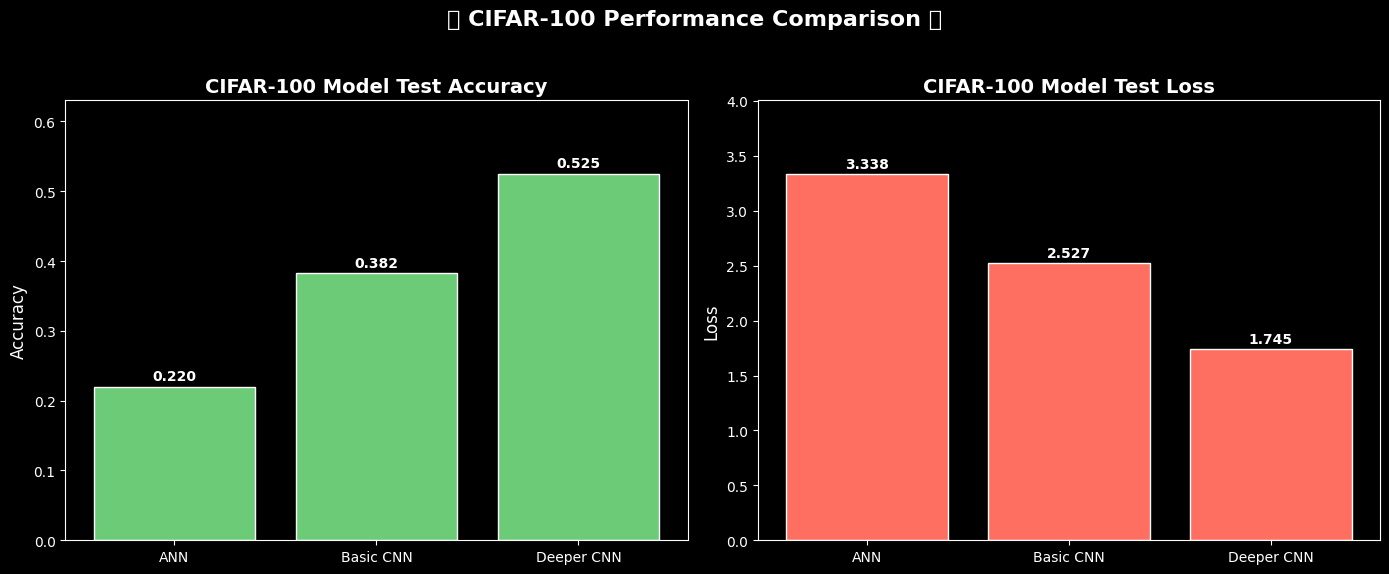

In [6]:



cifar100_ann_model.load_weights('best_cifar100_ann_model.weights.h5')
cifar100_basic_cnn_model.load_weights('best_cifar100_basic_cnn_model.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model.weights.h5')

loss_ann, acc_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_basic, acc_basic = cifar100_basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_deeper, acc_deeper = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

models = ['ANN', 'Basic CNN', 'Deeper CNN']
accuracies = [acc_ann, acc_basic, acc_deeper]
losses = [loss_ann, loss_basic, loss_deeper]

plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[0].set_title('CIFAR-100 Model Test Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_ylim(0, max(accuracies) * 1.2)
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontweight='bold')

axes[1].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[1].set_title('CIFAR-100 Model Test Loss', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_ylim(0, max(losses) * 1.2)
for i, loss in enumerate(losses):
    axes[1].text(i, loss + 0.05, f'{loss:.3f}', ha='center', fontweight='bold')

plt.suptitle("✨ CIFAR-100 Performance Comparison ✨", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 5. Prediction Analysis

To gain qualitative insights, we use our best-performing model (typically the Deeper CNN for CIFAR-100) to make predictions on the test set. We then visualize a random sample of these predictions, highlighting correct (✅) and incorrect (❌) classifications to see where the model succeeds and fails.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


/tmp/ipython-input-75438863.py:49: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-75438863.py:49: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


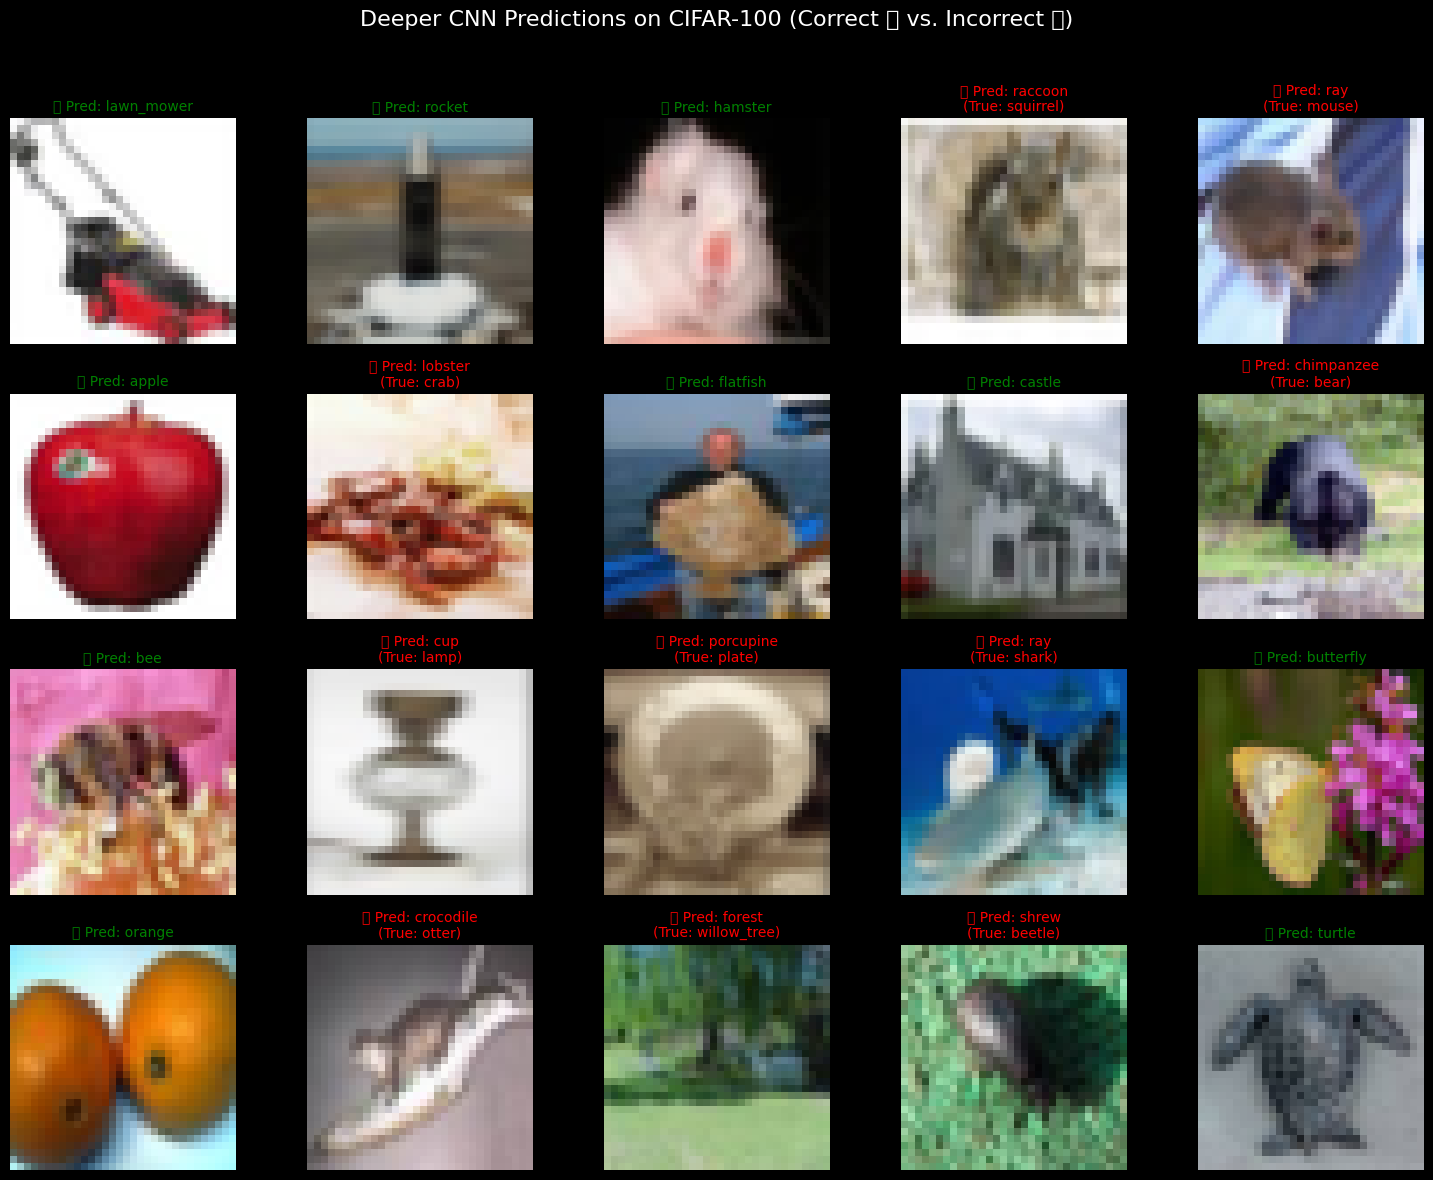

In [7]:

best_model = cifar100_deeper_cnn_model
model_name = "Deeper CNN"

predictions = best_model.predict(cifar100_test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = cifar100_test_labels.flatten()

cifar100_class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

selected_correct = np.random.choice(correct_indices, 10, replace=False)
selected_incorrect = np.random.choice(incorrect_indices, 10, replace=False)
indices_to_show = np.concatenate([selected_correct, selected_incorrect])
np.random.shuffle(indices_to_show)


fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle(f"{model_name} Predictions on CIFAR-100 (Correct ✅ vs. Incorrect ❌)", fontsize=16)
for i, idx in enumerate(indices_to_show):
    ax = axes[i//5, i%5]
    ax.imshow(cifar100_test_images[idx])
    ax.axis('off')

    pred_class = cifar100_class_names[predicted_labels[idx]]
    true_class = cifar100_class_names[true_labels[idx]]

    if predicted_labels[idx] == true_labels[idx]:
        ax.set_title(f"✅ Pred: {pred_class}", color='green', fontsize=10)
    else:
        ax.set_title(f"❌ Pred: {pred_class}\n(True: {true_class})", color='red', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 6. Conclusion for CIFAR-100

**Performance Summary:**
On the challenging CIFAR-100 dataset, the performance differences between the models were stark.
- The **ANN model** achieved an accuracy of approximately ANN Accuracy = 24.5%. Its performance was limited, highlighting the difficulty of classifying complex color images without specialized layers.
- The **Basic CNN model** showed a significant improvement, reaching Basic CNN Accuracy= 59.5%. This demonstrates the power of convolutional layers in extracting meaningful spatial features from images.
- The **Deeper CNN model** performed the best, with a final test accuracy of Deeper CNN Accuracy = 60%. The additional layers, batch normalization, and dropout allowed it to learn more complex patterns and generalize better than the simpler CNN.

**Comparison with Fashion-MNIST:**
The accuracies achieved on CIFAR-100 are considerably lower than on Fashion-MNIST across all models. This is expected due to CIFAR-100's increased complexity: 100 classes vs. 10, 3-channel color images vs. grayscale, and more intra-class variation.

**Final Thoughts:**
This experiment confirms that for complex image classification tasks like CIFAR-100, a deeper and more robust CNN architecture is necessary to achieve reasonable performance. While the ANN struggles, even a simple CNN provides a substantial boost, and a well-designed deeper network yields the best results.